In [ ]:
!pip install -U transformers datasets torchaudio scikit-learn pandas --quiet
import os; os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 821.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 921.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158

In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 1. INSTALL DEPENDENCIES
# ────────────────────────────────────────────────────────────────────────────────
!pip install transformers datasets torchaudio scikit-learn pandas --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 2. IMPORTS
# ────────────────────────────────────────────────────────────────────────────────
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoProcessor, WavLMForSequenceClassification, TrainingArguments, Trainer

In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 3. LOAD & CLEAN DATASET
# ────────────────────────────────────────────────────────────────────────────────
dataset = load_dataset("birgermoell/Italian_Parkinsons_Voice_and_Speech", split="train")

Resolving data files:   0%|          | 0/833 [00:00<?, ?it/s]

PR1ssacvhei61M1606161750.wav:   0%|          | 0.00/5.25M [00:00<?, ?B/s]

VU2ssacvhei61M1606161748.wav:   0%|          | 0.00/574k [00:00<?, ?B/s]

B1ubguot_t40M1606161755.wav:   0%|          | 0.00/5.83M [00:00<?, ?B/s]

VE2ssacvhei61M1606161745.wav:   0%|          | 0.00/572k [00:00<?, ?B/s]

FB1ssacvhei61M1606161751.wav:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

FB1ubguot_t40M1606161807.wav:   0%|          | 0.00/2.97M [00:00<?, ?B/s]

VI1ssacvhei61M1606161746.wav:   0%|          | 0.00/1.79M [00:00<?, ?B/s]

B2ubguot_t40M1606161756.wav:   0%|          | 0.00/5.76M [00:00<?, ?B/s]

VO2ssacvhei61M1606161747.wav:   0%|          | 0.00/575k [00:00<?, ?B/s]

D1ubguot_t40M1606161758.wav:   0%|          | 0.00/603k [00:00<?, ?B/s]

VA2ssacvhei61M1606161744.wav:   0%|          | 0.00/574k [00:00<?, ?B/s]

VO1ssacvhei61M1606161747.wav:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

D2ubguot_t40M1606161758.wav:   0%|          | 0.00/585k [00:00<?, ?B/s]

VA1ssacvhei61M1606161744.wav:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

VU1ssacvhei61M1606161748.wav:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

VI2ssacvhei61M1606161746.wav:   0%|          | 0.00/573k [00:00<?, ?B/s]

PR1ubguot_t40M1606161806.wav:   0%|          | 0.00/4.64M [00:00<?, ?B/s]

VA2ubguot_t40M1606161759.wav:   0%|          | 0.00/597k [00:00<?, ?B/s]

VA1ubguot_t40M1606161759.wav:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

VE1ubguot_t40M1606161800.wav:   0%|          | 0.00/948k [00:00<?, ?B/s]

VE2ubguot_t40M1606161801.wav:   0%|          | 0.00/569k [00:00<?, ?B/s]

VU1ubguot_t40M1606161803.wav:   0%|          | 0.00/928k [00:00<?, ?B/s]

VI1ubguot_t40M1606161801.wav:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

VO2ubguot_t40M1606161803.wav:   0%|          | 0.00/580k [00:00<?, ?B/s]

VO1ubguot_t40M1606161802.wav:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

VI2ubguot_t40M1606161802.wav:   0%|          | 0.00/574k [00:00<?, ?B/s]

B2vsiptioz46M1606161701.wav:   0%|          | 0.00/5.25M [00:00<?, ?B/s]

VU2ubguot_t40M1606161804.wav:   0%|          | 0.00/576k [00:00<?, ?B/s]

D2vsiptioz46M1606161704.wav:   0%|          | 0.00/582k [00:00<?, ?B/s]

D1vsiptioz46M1606161702.wav:   0%|          | 0.00/575k [00:00<?, ?B/s]

B1vsiptioz46M1606161659.wav:   0%|          | 0.00/5.52M [00:00<?, ?B/s]

FB1vsiptioz46M1606161712.wav:   0%|          | 0.00/2.50M [00:00<?, ?B/s]

PR1vsiptioz46M1606161711.wav:   0%|          | 0.00/4.79M [00:00<?, ?B/s]

VA1vsiptioz46M1606161705.wav:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

VA2vsiptioz46M1606161705.wav:   0%|          | 0.00/575k [00:00<?, ?B/s]

VI2vsiptioz46M1606161707.wav:   0%|          | 0.00/577k [00:00<?, ?B/s]

VE2vsiptioz46M1606161706.wav:   0%|          | 0.00/573k [00:00<?, ?B/s]

VE1vsiptioz46M1606161706.wav:   0%|          | 0.00/1.24M [00:00<?, ?B/s]

VI1vsiptioz46M1606161707.wav:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

VO2vsiptioz46M1606161708.wav:   0%|          | 0.00/574k [00:00<?, ?B/s]

VU1vsiptioz46M1606161709.wav:   0%|          | 0.00/1.49M [00:00<?, ?B/s]

VO1vsiptioz46M1606161708.wav:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

VU2vsiptioz46M1606161709.wav:   0%|          | 0.00/574k [00:00<?, ?B/s]

(…)Parkinson%27s%20Voice%20and%20speech.zip:   0%|          | 0.00/593M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1662 [00:00<?, ? examples/s]

In [ ]:
# Initialize lists to store the fixed paths and the indices of the samples to keep
fixed_paths, keep_indices = [], []

# Loop through the dataset to process each sample and extract relevant paths
for idx, sample in enumerate(dataset):
    path = sample['audio']['path']
    if ".zip" in path: # Skip zip files as they don't contain audio data
        continue
    parts = path.split('/'). # Split the path by '/' to extract folder information
    try:
        # Locate 'italian_parkinson' in the path to extract relevant information
        idx_p = parts.index('italian_parkinson')
        group = parts[idx_p + 1]

        # Check if the group is "28 People with Parkinson's disease" and process it accordingly
        if group == "28 People with Parkinson's disease":
            if idx_p + 3 < len(parts):
                group_candidate = parts[idx_p + 2]
                # Check if the group candidate is a valid speaker ID
                if "-" in group_candidate and all(x.isdigit() for x in group_candidate.split('-')):
                    speaker = parts[idx_p + 3]
                    filename = parts[idx_p + 4]
                    # Construct the new path for the sample
                    new_parts = parts[:idx_p+2] + [speaker, filename]
                    new_path = '/'.join(new_parts)
                    fixed_paths.append(new_path)
                    keep_indices.append(idx)
                    continue

        # If the group is not "28 People with Parkinson's disease", just append the existing path
        new_path = '/'.join(parts)
        fixed_paths.append(new_path)
        keep_indices.append(idx)
    except Exception as e:
        continue

filtered_dataset = dataset.select(keep_indices)

def update_audio_path(sample, fixed_path):
    #   """
    # Update the path for the audio sample.

    # Args:
    #     sample (dict): A dictionary representing a sample in the dataset, containing audio data.
    #     fixed_path (str): The new fixed path for the audio file.

    # Returns:
    #     dict: A dictionary with the updated 'audio' path.

    # Example:
    #     >>> sample = {"audio": {"path": "old_path"}}
    #     >>> updated_sample = update_audio_path(sample, "new_path")
    #     >>> print(updated_sample['audio']['path'])  # Output: "new_path"
    # """
    audio = dict(sample["audio"])
    audio["path"] = fixed_path
    return {"audio": audio}

# Apply the update_audio_path function to each sample in the filtered dataset
updated_audio = [update_audio_path(filtered_dataset[i], fixed_paths[i]) for i in range(len(filtered_dataset))]

# Convert the filtered dataset into a dictionary and update the audio paths
data_dict = filtered_dataset.to_dict()
data_dict["audio"] = [item["audio"] for item in updated_audio]

# Recreate the filtered dataset with the updated paths
filtered_dataset = Dataset.from_dict(data_dict)

In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 4. LABEL EXTRACTION & SPLIT
# ────────────────────────────────────────────────────────────────────────────────
def extract_label_from_path(path):
    # """
    # Extracts the label (0 for Healthy Control, 1 for Parkinson's Disease) from the file path.

    # Args:
    #     path (str): The file path of the audio sample.

    # Returns:
    #     int: 0 for Healthy Control ('HC'), 1 for Parkinson's Disease ('PD'), or -1 for unknown labels.

    # Example:
    #     >>> extract_label_from_path("some/path/to/italian_parkinson/28 People with Parkinson's disease/01-somefile.wav")
    #     1
    # """
    folder = path.split('/')[-3].lower()
    if 'healthy' in folder or 'control' in folder:
        return 0
    elif 'disease' in folder or 'parkinson' in folder:
        return 1
    else:
        return -1

samples = []
for i, sample in enumerate(filtered_dataset):
    path = sample['audio']['path']
    label = extract_label_from_path(path)
    if label in [0, 1]:
        samples.append({'id': f'sample_{i}', 'array': sample['audio']['array'], 'label': label, 'path': path})
df = pd.DataFrame(samples)

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
valid_df, test_df = train_test_split(test_df, test_size=0.5, stratify=test_df['label'], random_state=42)

train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
valid_dataset = Dataset.from_pandas(valid_df, preserve_index=False)
test_dataset  = Dataset.from_pandas(test_df, preserve_index=False)

In [ ]:
print("Train label counts:", train_df['label'].value_counts())
print("Valid label counts:", valid_df['label'].value_counts())
print("Test label counts:", test_df['label'].value_counts())

Train label counts: label
1    349
0    315
Name: count, dtype: int64
Valid label counts: label
1    44
0    39
Name: count, dtype: int64
Test label counts: label
1    44
0    40
Name: count, dtype: int64


In [ ]:
print(train_df.dtypes.value_counts())
print(valid_df.dtypes.value_counts())
print(test_df.dtypes.value_counts())

object    3
int64     1
Name: count, dtype: int64
object    3
int64     1
Name: count, dtype: int64
object    3
int64     1
Name: count, dtype: int64


In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 5. PREPROCESS AUDIO FOR WAVLM
# ────────────────────────────────────────────────────────────────────────────────
# Instead of AutoProcessor, use AutoFeatureExtractor for WavLM
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/wavlm-base-plus", trust_remote_code=True)

def preprocess_function(batch):
    #"""
    # Preprocesses a batch of audio samples for model input.

    # This function extracts features from the raw audio waveform using a pre-trained feature extractor
    # (WavLM), ensuring that the input is properly padded/truncated to the specified length.

    # Args:
    #     batch (dict): A dictionary containing audio data ("array") and the corresponding label.
    #                   The key "array" should hold the raw waveform audio data.
    #                   The key "label" should hold the target label for the audio sample.

    # Returns:
    #     dict: A dictionary with keys:
    #         - "input_values": The processed audio data as a tensor.
    #         - "attention_mask": A tensor indicating the padded areas of the input (if available).
    #         - "label": The label for the current sample.

    # Example:
    #     >>> preprocess_function({"array": [0.1, 0.2, 0.3], "label": 1})
    #     {
    #         "input_values": tensor([0.1, 0.2, 0.3]),
    #         "label": 1
    #     }
    # """
    audio = batch["array"]
    inputs = feature_extractor(
        audio,
        sampling_rate=16000,
        return_tensors="pt",
        padding="max_length",
        max_length=16000,  # Reduced sequence length further
        truncation=True
    )
    return {
        "input_values": inputs.input_values[0],
        "attention_mask": inputs.attention_mask[0] if "attention_mask" in inputs else None,
        "label": batch["label"]
    }

train_dataset = train_dataset.map(preprocess_function)
valid_dataset = valid_dataset.map(preprocess_function)
test_dataset  = test_dataset.map(preprocess_function)

def collate_fn(batch):
    # """
    # Custom collate function for batching samples.

    # This function takes a batch of data (typically from a Dataset) and ensures that all elements are
    # converted into tensors. It also handles attention masks if they are present.

    # Args:
    #     batch (list): A list of dictionaries containing the keys "input_values" and "label",
    #                   and optionally "attention_mask".

    # Returns:
    #     dict: A dictionary containing:
    #         - "input_values": A tensor stack of all the input values in the batch.
    #         - "labels": A tensor of the corresponding labels for the batch.
    #         - "attention_mask" (optional): A tensor of the attention mask, if available.

    # Example:
    #     >>> collate_fn([{"input_values": [0.1, 0.2], "label": 1}, {"input_values": [0.3, 0.4], "label": 0}])
    #     {
    #         "input_values": tensor([[0.1, 0.2], [0.3, 0.4]]),
    #         "labels": tensor([1, 0])
    #     }
    # """
    # Always convert input_values to torch.Tensor, if it's not already!
    def to_tensor(x):
        return torch.tensor(x) if not isinstance(x, torch.Tensor) else x

    input_values = torch.stack([to_tensor(item['input_values']) for item in batch])
    labels = torch.tensor([item['label'] for item in batch])
    if "attention_mask" in batch[0] and batch[0]["attention_mask"] is not None:
        attention_mask = torch.stack([to_tensor(item['attention_mask']) for item in batch])
        return {"input_values": input_values, "labels": labels, "attention_mask": attention_mask}
    else:
        return {"input_values": input_values, "labels": labels}


preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

Map:   0%|          | 0/664 [00:00<?, ? examples/s]

Map:   0%|          | 0/83 [00:00<?, ? examples/s]

Map:   0%|          | 0/84 [00:00<?, ? examples/s]

In [ ]:
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(valid_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Train set size: 664
Validation set size: 83
Test set size: 84


In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 6. MODEL, TRAININGARGS, TRAINER
# ────────────────────────────────────────────────────────────────────────────────
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
os.environ["WANDB_DISABLED"] = "true"

model = WavLMForSequenceClassification.from_pretrained("microsoft/wavlm-base-plus", num_labels=2)

def compute_metrics(eval_pred):
    # """
    # Computes accuracy, F1 score, and ROC-AUC score for model evaluation.

    # This function is used during the evaluation phase of training to compute common metrics:
    # accuracy, F1 score, and the ROC AUC score. The function assumes the output is for a
    # binary classification task.

    # Args:
    #     eval_pred (tuple): A tuple containing the model's predictions (logits) and true labels.
    #                         - logits (np.ndarray): The predicted logits from the model, shape (batch_size, num_labels).
    #                         - labels (np.ndarray): The true labels, shape (batch_size,).

    # Returns:
    #     dict: A dictionary containing the calculated metrics:
    #         - "accuracy" (float): The accuracy score.
    #         - "f1" (float): The F1 score.
    #         - "roc_auc" (float): The ROC AUC score.

    # Example:
    #     eval_pred = (logits, labels)
    #     metrics = compute_metrics(eval_pred)
    #     print(metrics)
    # """
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    try:
        auc = roc_auc_score(labels, logits[:, 1])
    except:
        auc = 0.0
    return {"accuracy": acc, "f1": f1, "roc_auc": auc}

training_args = TrainingArguments(
    output_dir="./wavlm-pd-output",
    # Replace 'evaluation_strategy' with 'eval_strategy'
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,     # lower if OOM
    per_device_eval_batch_size=2,
    num_train_epochs=15,
    fp16=torch.cuda.is_available(),
    load_best_model_at_end=True,
    logging_dir="./logs",
    metric_for_best_model="accuracy",  # fix the KeyError
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    tokenizer=feature_extractor,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of WavLMForSequenceClassification were not initialized from the model checkpoint at microsoft/wavlm-base-plus and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-27-7368843495fe>:36: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Roc Auc
1,No log,0.676395,0.819277,0.838710,0.891317
2,0.259100,0.377748,0.927711,0.930233,0.969697
3,0.259100,0.314258,0.951807,0.953488,0.993881
4,0.081800,0.880045,0.855422,0.866667,0.971737
5,0.070000,0.348404,0.951807,0.952381,0.998252
6,0.070000,0.652811,0.915663,0.926316,0.962121
7,0.028200,0.805189,0.891566,0.886076,0.966200
8,0.077200,0.183790,0.975904,0.977273,0.997086
9,0.077200,0.327581,0.951807,0.953488,0.996503
10,0.007600,0.497496,0.939759,0.942529,0.982517


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


TrainOutput(global_step=4980, training_loss=0.05634721655204114, metrics={'train_runtime': 858.6033, 'train_samples_per_second': 11.6, 'train_steps_per_second': 5.8, 'total_flos': 9.042928521984e+16, 'train_loss': 0.05634721655204114, 'epoch': 15.0})

In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 7. PRINT ERRORS, CONFUSION MATRIX, ROC/PR CURVES
# ────────────────────────────────────────────────────────────────────────────────
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def get_preds_and_probs(dataset):
    # """
    # Gets predictions and probabilities from the model for a given dataset.

    # This function uses the `trainer.predict` method to make predictions on the provided dataset.
    # It returns the true labels (`y_true`), predicted labels (`y_pred`), and the predicted probabilities
    # (`y_prob`), which are essential for evaluating the model's performance.

    # Args:
    #     dataset (Dataset): The dataset for which predictions are to be made.
    #                         The dataset must be in a format compatible with the Hugging Face `Trainer` API.

    # Returns:
    #     tuple: A tuple containing:
    #         - `y_true` (np.ndarray): The true labels of the dataset.
    #         - `y_pred` (np.ndarray): The predicted labels from the model.
    #         - `y_prob` (np.ndarray): The predicted probabilities for the positive class (class 1).

    # Example:
    #     y_true, y_pred, y_prob = get_preds_and_probs(test_dataset)
    #     print(f"True Labels: {y_true}, Predicted Labels: {y_pred}, Predicted Probabilities: {y_prob}")
    # """

    preds = trainer.predict(dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)
    y_prob = preds.predictions[:, 1] if preds.predictions.shape[1] > 1 else preds.predictions[:, 0]
    return y_true, y_pred, y_prob

splits = {
    "Train": train_dataset,
    "Validation": valid_dataset,
    "Test": test_dataset,
}
split_results = {}

for name, splitset in splits.items():
    y_true, y_pred, y_prob = get_preds_and_probs(splitset)
    split_results[name] = (y_true, y_pred, y_prob)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} | Accuracy: {acc:.4f} | F1: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Train | Accuracy: 0.9774 | F1: 0.9789


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Validation | Accuracy: 0.9759 | F1: 0.9773


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Test | Accuracy: 0.9643 | F1: 0.9655



Classification Report (Test):
              precision    recall  f1-score   support

     Healthy       0.95      0.97      0.96        40
 Parkinson's       0.98      0.95      0.97        44

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



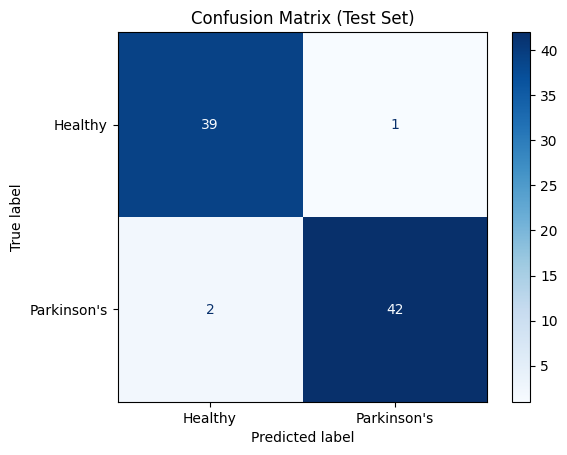

In [ ]:
# TEST SET METRICS
y_true, y_pred, y_prob = split_results["Test"]

print("\nClassification Report (Test):")
print(classification_report(y_true, y_pred, target_names=["Healthy", "Parkinson's"]))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Healthy", "Parkinson's"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()

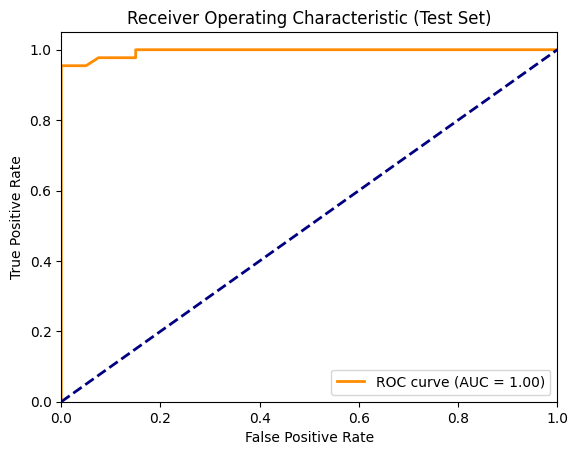

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Test Set)")
plt.legend(loc="lower right")
plt.show()

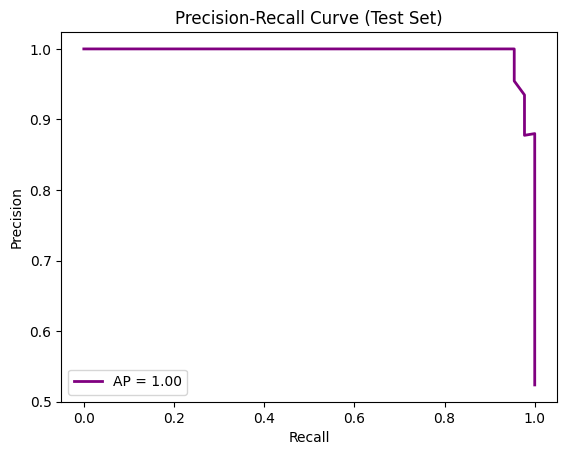

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_prob)
ap = average_precision_score(y_true, y_prob)
plt.figure()
plt.plot(recall, precision, color="purple", lw=2, label=f"AP = {ap:.2f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Test Set)")
plt.legend(loc="lower left")
plt.show()